This is how you import the class

In [50]:
import sys
sys.path.append('../')
import cats
from cats.pawprint.pawprint import Pawprint, Footprint2D
from cats.cmd.CMD import Isochrone
from cats.proper_motions import ProperMotionSelection

importing other stuff for this notebook

In [66]:
import numpy as np
import galstreams as gst
import gala.coordinates as gc
from astropy.coordinates import SkyCoord
import astropy.units as u
import astropy.table as at
from scipy.interpolate import InterpolatedUnivariateSpline
from matplotlib import pyplot as plt
import matplotlib as mpl
import importlib

In [53]:
mwsts = gst.MWStreams(verbose=False, implement_Off=False)
GD1_track6D = mwsts['GD-1-I21']

Initializing galstreams library from master_log... 


In [149]:
p.track

load a pawprint from galstreams (creates a sky footprint for the stream and background from the track, leaves others blank)

In [148]:
p = Pawprint.pawprint_from_galstreams('GD-1','pricewhelan2018')
p1 = Pawprint.pawprint_from_galstreams('GD-1','ibata2021')

In [129]:
p.track.track.transform_to(stream_fr)

<SkyCoord (GreatCircleICRSFrame: pole=<ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
    (34.5987, 29.7331, 1.)>, center=None, ra0=200.48591243455303 deg, rotation=0.0 deg): (phi1, phi2, distance) in (deg, deg, kpc)
    [(-90.08575688, -3.48333081,  5.50834758),
     (-90.07575609, -3.48186066,  5.50884762),
     (-90.0657553 , -3.48039098,  5.50934766), ...,
     (  9.70211273, -1.9617604 , 10.49774106),
     (  9.71211351, -1.96251726, 10.4982411 ),
     (  9.7221143 , -1.96327395, 10.49874114)]
 (pm_phi1_cosphi2, pm_phi2, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-8.01001683, -1.80139711, 1.92201905e-10),
     (-8.01140257, -1.80314302, 1.92198747e-10),
     (-8.01278885, -1.80488757, 1.92227693e-10), ...,
     (-8.32021112, -1.9971079 , 2.25141314e-10),
     (-8.31979417, -1.9971719 , 2.25213417e-10),
     (-8.319378  , -1.99723637, 2.25239732e-10)]>

In [127]:
stream_obj = p.track
stream_fr = stream_obj.stream_frame
track = stream_obj.track.transform_to(stream_fr)
gd1_track = gc.reflex_correct(track)

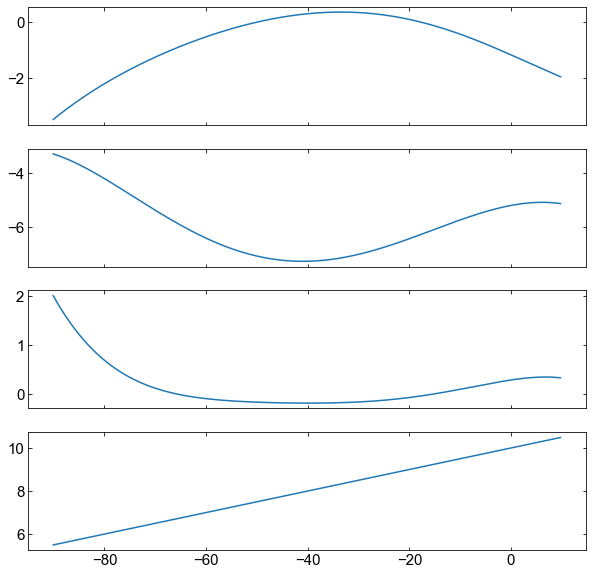

In [128]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
ax1.plot(gd1_track.phi1, gd1_track.phi2)
ax2.plot(gd1_track.phi1, gd1_track.pm_phi1_cosphi2)
ax3.plot(gd1_track.phi1, gd1_track.pm_phi2)
ax4.plot(gd1_track.phi1, gd1_track.distance)


In [196]:
spline_dist(-35)

array(8.26263542)

In [67]:
pm_phi1_cosphi2 = gd1_track.pm_phi1_cosphi2.value
spline_pm1 = InterpolatedUnivariateSpline(gd1_track.phi1.value, pm_phi1_cosphi2)
spline_pm1(-40)

array(-7.27290016)

In [35]:
fn = "/Users/Tavangar/CATS_workshop/cats/data/joined-GD-1.fits"
cat = at.Table.read(fn)

In [216]:
importlib.reload(sys.modules['cats.cmd.CMD'])
importlib.reload(sys.modules['cats.pawprint.pawprint'])
from cats.pawprint.pawprint import Pawprint, Footprint2D
from cats.cmd.CMD import Isochrone
fn = "/Users/Tavangar/CATS_workshop/cats/data/joined-GD-1.fits"
cat = at.Table.read(fn)

p = Pawprint.pawprint_from_galstreams('GD-1','pricewhelan2018')

pm_poly = [[-9, -2], [-9, 0.5], [-4, 1.5], [-4, -1]]
p.pmprint = Footprint2D(pm_poly, footprint_type='cartesian')


o = Isochrone(
    cat,
    age=10.00,  # Gyr
    feh=-1.5,
    distance=8.3,  # kpc
    dist_grad=0,
    alpha=0.0,
    pawprint=p,
)

o.generate_isochrone()
o.sel_sky()
o.sel_pm()
o.data_cmd(0.03, 0.2)
o.correct_isochrone()


iso_patch, iso_mask, iso_model, iso_low, iso_high, pprint = o.simpleSln(
    0.1, 15, mass_thresh=0.83
)

../cats/cmd/CMD.py:278: RuntimeWarning: invalid value encountered in true_divide
  signal = signal / signal_counts



Fitting for peak pm location
Pre-fitting mean PM values: -7.272900158974571, -0.18291982459766967
Post-fitting (pm1_mean, pm2_mean, pm1_std, pm2_std): [-7.388805876941429, -0.3599041252958724, 0.28803169399079553, 0.31971115082343654] 

Producing the initial mask
Pre-fitting mean PM values: -7.388805876941429, -0.3599041252958724
Post-fitting (pm1_mean, pm2_mean, pm1_std, pm2_std): [-7.388805876941429, -0.3599041252958724, 0.28803169399079553, 0.31971115082343654] 

Producing the final initial mask


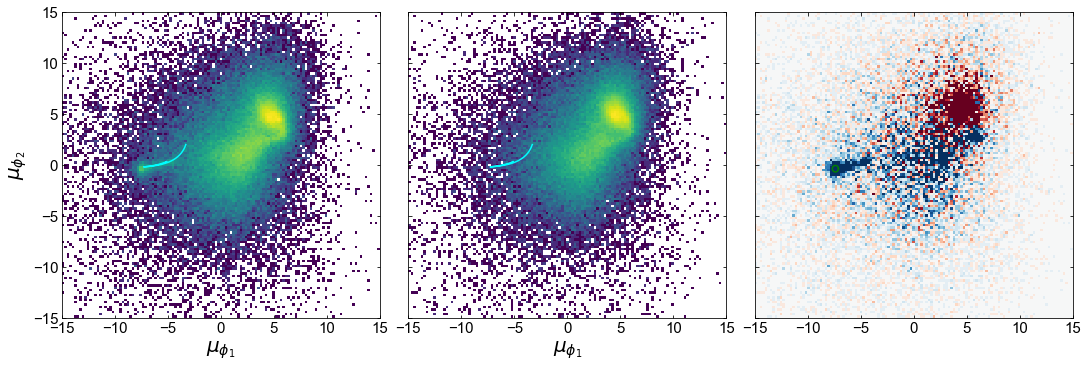

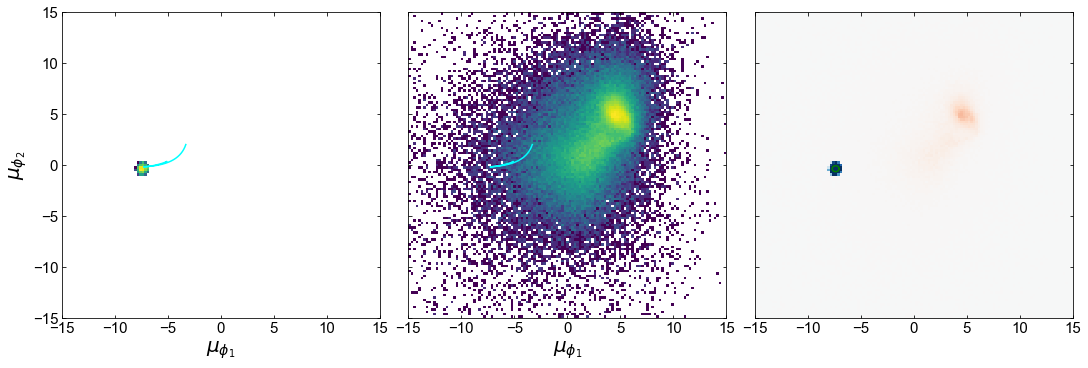

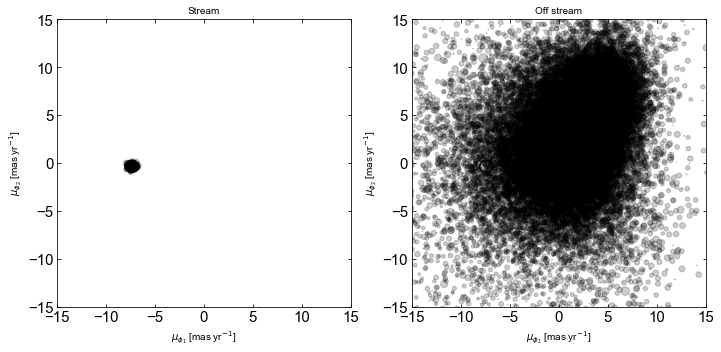

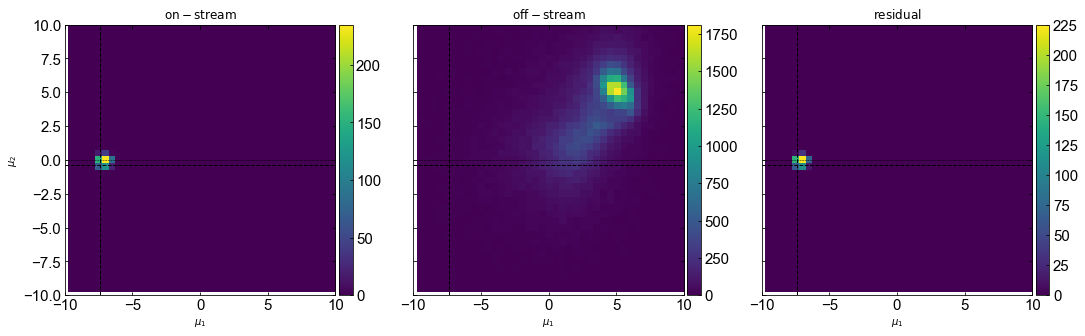

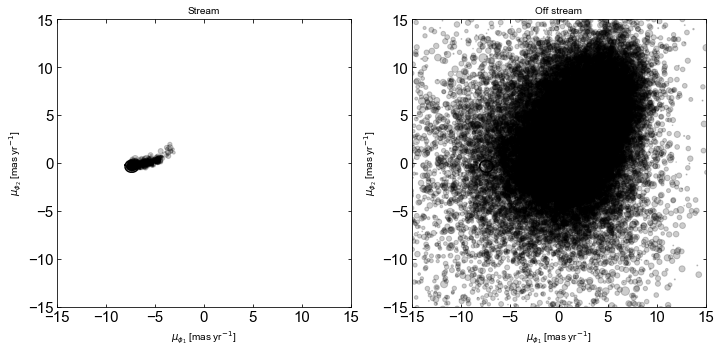

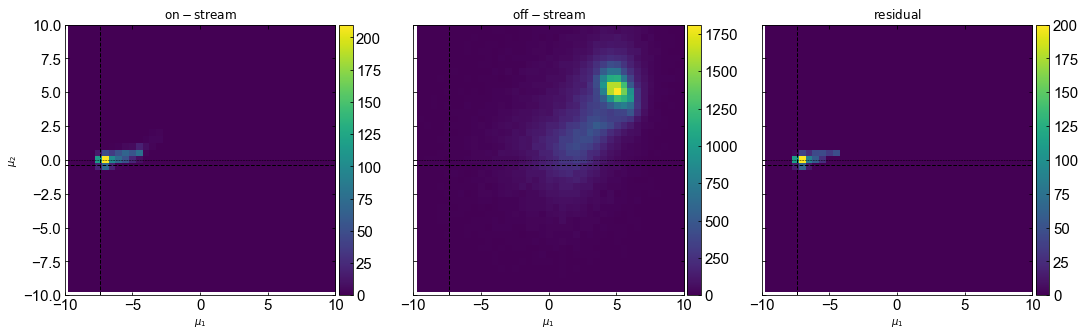

In [217]:
import sys
import importlib
importlib.reload(sys.modules['cats.cmd.CMD'])
importlib.reload(sys.modules['cats.pawprint.pawprint'])
importlib.reload(sys.modules['cats.proper_motions'])
from cats.pawprint.pawprint import Pawprint, Footprint2D
from cats.proper_motions import ProperMotionSelection
import astropy.table as at

fn = "/Users/Tavangar/CATS_workshop/cats/data/joined-GD-1.fits"
cat = at.Table.read(fn)
    
pmsel = ProperMotionSelection(cat, pprint, distance=8.3, n_dispersion_phi1=3, n_dispersion_phi2=3, cutoff=0.1)

In [218]:
print(np.max(pmsel.pawprint.pmprint.vertices, axis=0), np.min(pmsel.pawprint.pmprint.vertices, axis=0))

[-6.69096514  0.24636069] [-8.04629281 -0.96149327]


In [219]:
cat[pmsel.mask]

source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,ruwe,astrometric_matched_transits,phi1,phi2,pm_phi1_cosphi2,pm_phi1_cosphi2_unrefl,pm_phi2,pm_phi2_unrefl,star_mask,g0,r0,i0,z0,y0
,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,
int64,float64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64
582446459246191232,129.81445144497968,4.697130336012922,0.27979149726027375,0.20786507,-2.5204283547968878,0.21694608,-11.006883471920714,0.15520492,0.038374454,-0.09554334,0.025625015,0.103452824,0.070854634,-0.17386083,0.40782472,-0.22026227,-0.16187286,18.832907,651.0578,19.088825,49.1348,18.471064,45.46918,1.0106571,55,-76.22364035618972,-2.181174537279827,-5.241239327809699,-10.788142341492044,0.24365731675424251,-3.3346705498162956,True,18.985871836543083,18.777556985616684,18.740677673369646,18.73082122951746,18.740872217342257
582459584666428032,129.91612525532696,4.9080388678973454,-0.008368314644516265,0.21402884,-2.2664152533160773,0.22070704,-10.787997674903874,0.1713324,0.08696285,-0.19313523,0.22680359,0.08600198,0.238377,-0.43789837,0.53278303,-0.30199307,-0.40716568,18.63632,671.9811,18.89929,38.91828,18.310513,49.435867,0.9901654,56,-75.99018794420891,-2.16312559332247,-4.913591207677987,-10.470387877609285,0.1261044250537197,-3.447971813487992,True,18.76174906641245,18.575414545834064,18.51992826908827,18.546300657093525,18.558646641671658
582480028709963904,130.2182393313286,4.904060797026815,0.3340594322104794,0.09655516,-2.0870306665510183,0.0993899,-10.241590351216434,0.079162985,-0.16934712,-0.17235017,0.21938501,0.2258903,0.22300382,-0.33288342,0.45219722,-0.2708219,-0.3988594,17.354687,1434.8987,17.627817,122.77234,16.919998,160.61996,0.98641276,55,-75.84251867951593,-2.4255183120352406,-4.3428476595002525,-9.905835790709,0.21230534077074095,-3.3347094645204898,True,17.537590891122818,17.282858915627003,17.20818031951785,17.195234782993793,17.152203913778067
582649181702362112,130.66474589307592,5.801913905287673,-0.0645518071178028,0.4550672,-2.296135714679803,0.50973564,-10.526921352119755,0.40124008,0.044439897,-0.2932144,0.08761403,0.04403869,0.13709654,-0.30579093,0.3385378,-0.3219544,-0.33962154,19.890362,328.5802,20.130077,20.164959,19.434874,19.269999,1.007912,52,-74.84199358945034,-2.358715578194073,-4.649178914905112,-10.25276303883327,0.21664766513135955,-3.3119725909912456,True,19.984879970550537,19.65705455839634,19.571051359176636,19.531247854232788,19.38393747806549
594587610237504128,129.35910142548198,5.569006676739652,0.2440033725805288,0.13907896,-2.151468071956329,0.14374273,-10.898043547539395,0.10485032,-0.0076287175,-0.33353207,0.1077759,0.0749953,0.16149423,-0.3451864,0.4037519,-0.17747861,-0.2283615,18.164648,1048.1289,18.473001,69.64174,17.753141,88.72179,0.98796725,67,-75.69599251762764,-1.3518944906315562,-4.941516644363481,-10.51059731703168,0.043241661362221816,-3.5949286596424916,True,18.326803542673588,18.101668067276478,18.027788177132607,18.015939816832542,18.013807274401188
594671310560104704,130.34598779738243,5.960238476829206,0.10140045443946516,0.3330509,-2.38411573952081,0.3321901,-10.721832392917971,0.23391539,0.06251966,-0.24697092,0.110654704,0.024008399,0.11615524,-0.3324875,0.3375005,-0.35549715,-0.1324311,19.410175,438.73135,19.610409,33.801003,19.036173,26.252663,1.0462424,60,-74.86461056343086,-2.0050267538458533,-4.864729309860998,-10.46742169701916,0.23189985799098106,-3.3278793154242345,True,19.4693403989076

(-6.0, 3.0)

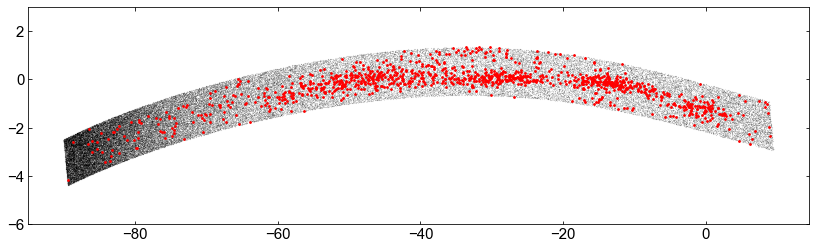

In [220]:
plt.figure(figsize=(14, 4))
plt.scatter(cat[pmsel.CMD_mask & pmsel.spatial_mask_on]['phi1'].value, 
            cat[pmsel.CMD_mask & pmsel.spatial_mask_on]['phi2'].value, c='k', s = 0.001)
plt.scatter(cat[pmsel.mask]['phi1'].value, 
            cat[pmsel.mask]['phi2'].value, c='r', s = 3)
plt.ylim(-6, 3)

In [221]:
pmsel.pawprint.track.track

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(124.0646377 , -7.97077298,  5.50834758),
     (124.06831761, -7.96136413,  5.50884762),
     (124.07199789, -7.95195551,  5.50934766), ...,
     (219.52460701, 58.20827053, 10.49774106),
     (219.54341787, 58.20676868, 10.4982411 ),
     (219.56222713, 58.20526419, 10.49874114)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-2.38349819, -7.85648379, 1.92090329e-10),
     (-2.38267622, -7.8585463 , 1.92174537e-10),
     (-2.38185575, -7.86060859, 1.92284007e-10), ...,
     (-8.44602006, -1.37080203, 2.25103947e-10),
     (-8.44599945, -1.36848967, 2.25213417e-10),
     (-8.44597898, -1.36617805, 2.25293414e-10)]>

In [223]:
o = Isochrone(
    cat,
    age=10.00,  # Gyr
    feh=-1.5,
    distance=8.3,  # kpc
    dist_grad=0,
    alpha=0.0,
    pawprint=pmsel.pawprint,
)

o.generate_isochrone()
o.sel_sky()
o.sel_pm()
o.data_cmd(0.03, 0.2)
o.correct_isochrone()


iso_patch, iso_mask, iso_model, iso_low, iso_high, pprint = o.simpleSln(
    0.1, 15, mass_thresh=0.83
)

../cats/cmd/CMD.py:278: RuntimeWarning: invalid value encountered in true_divide
  signal = signal / signal_counts



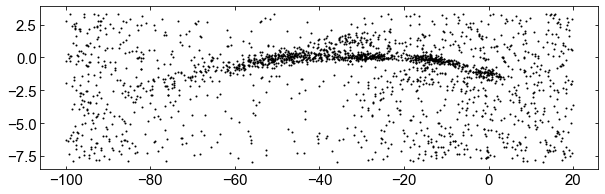

In [222]:
plt.figure(figsize=(10, 3))
plt.scatter(o.cat[pmsel.pm_mask & iso_mask]['phi1'], o.cat[pmsel.pm_mask & iso_mask]['phi2'], s=1, c='k')

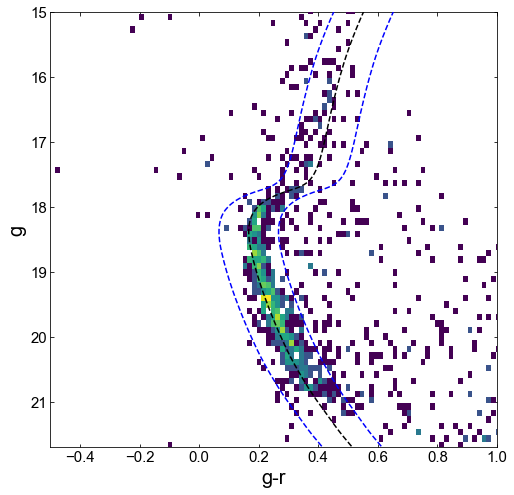

In [224]:
fig = o.plot_CMD(tolerance=0.1)
fig.savefig(
    "/Users/Tavangar/CATS_workshop/cats/cats/cmd/gd1_testcmd.png",
    dpi=300,
    bbox_inches="tight",
)

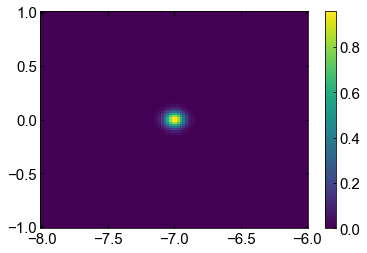

In [256]:
def two_dimensional_gaussian(x, y, x0, y0, sigma_x, sigma_y):
    """
    Evaluates a two dimensional gaussian distribution in x, y, with means x0, y0, and dispersions sigma_x and sigma_y
    """

    return np.exp(- ( (x-x0)**2/(2*sigma_x**2) + (y-y0)**2/(2*sigma_y**2) ) )

refine_factor = 100
pm_phi1_array = np.linspace(-8, -6, refine_factor)
pm_phi2_array = np.linspace(-1, 1, refine_factor)

pm_pdf = np.zeros((len(pm_phi1_array), refine_factor))
points_x = np.zeros((len(pm_phi1_array), refine_factor))
points_y = np.zeros((len(pm_phi1_array), refine_factor))

for n, s in enumerate(pm_phi1_array):
    pm_pdf[n,:] = two_dimensional_gaussian(s, pm_phi2_array, -7, 0, 0.05, 0.05)
    points_x[n,:] = np.array([s for _ in range(len(pm_phi2_array))])
    points_y[n,:] = pm_phi2_array

plt.pcolormesh(points_x, points_y, pm_pdf)
plt.colorbar()

In [257]:
from scipy.spatial import ConvexHull
cut = np.where(pm_pdf.flatten()> 0.68)[0]
x_cut = points_x.flatten()[cut]
y_cut = points_y.flatten()[cut]

xy = np.transpose([x_cut, y_cut])
hull = ConvexHull(xy)
xy = np.transpose([x_cut, y_cut])
xy[hull.vertices]

array([[-7.03030303, -0.03030303],
       [-6.96969697, -0.03030303],
       [-6.96969697,  0.03030303],
       [-7.03030303,  0.03030303]])

In [38]:
mwsts = gst.MWStreams(verbose=False, implement_Off=False)

Initializing galstreams library from master_log... 


In [84]:
GD1_track6D.track

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(123.27554451, -10.08867889,  9.19913413),
     (123.27915026, -10.07921446,  9.19864732),
     (123.2827562 , -10.06975018,  9.1981605 ), ...,
     (219.87607135,  57.91437012, 11.68099538),
     (219.89469935,  57.91254606, 11.68271884),
     (219.91332539,  57.91071903, 11.68444274)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-0.95430401, -7.40892771, 6.73661370e-14),
     (-0.95520505, -7.41182271, 7.57869042e-14),
     (-0.95610599, -7.41471691, 4.21038356e-14), ...,
     (-6.45077431, -1.33725963, 1.22101123e-13),
     (-6.44890581, -1.3354567 , 1.22101123e-13),
     (-6.44703651, -1.33365527, 7.15765206e-14)]>

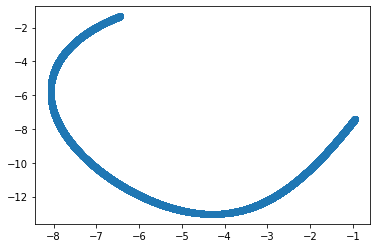

In [80]:
plt.scatter(GD1_track6D.track.pm_ra_cosdec.value, GD1_track6D.track.pm_dec.value)

In [145]:
GD1_track6D.track.transform_to(GD1_track6D.stream_frame)

<SkyCoord (GreatCircleICRSFrame: pole=<ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
    (34.78577978, 29.13133332, 1.)>, center=None, ra0=148.14590426569234 deg, rotation=0.0 deg): (phi1, phi2, distance) in (deg, deg, kpc)
    [(-51.13389982, -3.58965841,  9.19913413),
     (-51.12388038, -3.58818108,  9.19864732),
     (-51.11386095, -3.58670409,  9.1981605 ), ...,
     ( 51.12445608, -2.84931405, 11.68099538),
     ( 51.13447552, -2.85036334, 11.68271884),
     ( 51.14449495, -2.85141279, 11.68444274)]
 (pm_phi1_cosphi2, pm_phi2, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-6.9443532 , -2.75297379,  3.04200213e-13),
     (-6.94732263, -2.75358691,  7.05239247e-14),
     (-6.9502913 , -2.75419976,  1.83151685e-13), ...,
     (-6.3275544 , -1.83379602,  8.63128631e-14),
     (-6.32531066, -1.83365095,  7.47343083e-14),
     (-6.32306666, -1.83350599, -1.47363425e-14)]>

In [146]:
mwsts

{'20.0-1-M18': <galstreams.Track6D at 0x7fd240108390>,
 '300S-F18': <galstreams.Track6D at 0x7fd24152bcd0>,
 'AAU-AliqaUma-L21': <galstreams.Track6D at 0x7fd24152f8d0>,
 'AAU-ATLAS-L21': <galstreams.Track6D at 0x7fd23f7e1950>,
 'Acheron-G09': <galstreams.Track6D at 0x7fd23f7c2ed0>,
 'ACS-R21': <galstreams.Track6D at 0x7fd241537a50>,
 'Alpheus-G13': <galstreams.Track6D at 0x7fd242f29950>,
 'Aquarius-W11': <galstreams.Track6D at 0x7fd242f28fd0>,
 'C-19-I21': <galstreams.Track6D at 0x7fd24492fd90>,
 'C-4-I21': <galstreams.Track6D at 0x7fd24492a2d0>,
 'C-5-I21': <galstreams.Track6D at 0x7fd24010ca90>,
 'C-7-I21': <galstreams.Track6D at 0x7fd23f7c5e90>,
 'C-8-I21': <galstreams.Track6D at 0x7fd244224690>,
 'C-9-I21': <galstreams.Track6D at 0x7fd23f7c5f50>,
 'Cetus-New-Y21': <galstreams.Track6D at 0x7fd24151e050>,
 'Cetus-Palca-T21': <galstreams.Track6D at 0x7fd242d30c90>,
 'Cetus-Y13': <galstreams.Track6D at 0x7fd24153ee10>,
 'Cocytos-G09': <galstreams.Track6D at 0x7fd23b260990>,
 'Corvus-M1

Generate random points on the sphere in an area around the track

In [135]:
GD1_track6D = mwsts['GD-1-I21']
GD1_track = GD1_track6D.track
GD1_track_frame = GD1_track.transform_to(GD1_track6D.stream_frame)

phi1o, phi1f = np.min(GD1_track_frame.phi1.deg), np.max(GD1_track_frame.phi1.deg)
phi2o, phi2f = np.min(GD1_track_frame.phi2.deg), np.max(GD1_track_frame.phi2.deg)

#rao,raf = np.min(p.track.track.ra.deg), np.max(p.track.track.ra.deg) # need to wrap for Jhelum
rao,raf = np.min(p.track.track.ra.wrap_at(180*u.deg).deg), np.max(p.track.track.ra.wrap_at(180*u.deg).deg)
deco,decf = np.min(p.track.track.dec.deg),np.max(p.track.track.dec.deg)
field_ra, field_dec = gst.get_random_spherical_angles(5000,az=[rao,raf],
                                                           lat=[deco,decf],degree=True)
field = SkyCoord(ra=field_ra*u.deg, dec=field_dec*u.deg, frame='icrs')

In [136]:
p.skyprint['stream'].edges

<SkyCoord (GreatCircleICRSFrame: pole=<ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
    (34.78577978, 29.13133332, 1.)>, center=None, ra0=148.14590426569234 deg, rotation=0.0 deg): (phi1, phi2) in deg
    [(-51.13389982, -2.58965841), (-51.12388038, -2.58818108),
     (-51.11386095, -2.58670409), ..., (-51.11386095, -4.58670409),
     (-51.12388038, -4.58818108), (-51.13389982, -4.58965841)]>

In [137]:
p = Pawprint.pawprint_from_galstreams('GD-1','ibata2021')

In [138]:
p.skyprint['stream'].vertices[::100]

array([[-5.11338998e+01, -2.58965841e+00],
       [-5.01319563e+01, -2.44356088e+00],
       [-4.91300128e+01, -2.30075519e+00],
       [-4.81280693e+01, -2.16122502e+00],
       [-4.71261257e+01, -2.02495408e+00],
       [-4.61241822e+01, -1.89192603e+00],
       [-4.51222387e+01, -1.76212458e+00],
       [-4.41202952e+01, -1.63553339e+00],
       [-4.31183516e+01, -1.51213618e+00],
       [-4.21164081e+01, -1.39191661e+00],
       [-4.11144646e+01, -1.27485837e+00],
       [-4.01125211e+01, -1.16094516e+00],
       [-3.91105775e+01, -1.05016066e+00],
       [-3.81086340e+01, -9.42488557e-01],
       [-3.71066905e+01, -8.37912537e-01],
       [-3.61047470e+01, -7.36416287e-01],
       [-3.51028035e+01, -6.37983495e-01],
       [-3.41008599e+01, -5.42597847e-01],
       [-3.30989164e+01, -4.50243030e-01],
       [-3.20969729e+01, -3.60902732e-01],
       [-3.10950294e+01, -2.74560638e-01],
       [-3.00930858e+01, -1.91200436e-01],
       [-2.90911423e+01, -1.10805813e-01],
       [-2.

In [139]:
pm_poly = [[-9, -2], [-9, 0.5], [-4, 1.5], [-4, -1]]
p.pmprint = Footprint2D(pm_poly, footprint_type='cartesian')

In [140]:
p.pmprint.vertices

[[-9, -2], [-9, 0.5], [-4, 1.5], [-4, -1]]

generate masks for the on- and off-stream sky footprints

In [141]:
on = p.skyprint['stream'].inside_footprint(field)
off = p.skyprint['background'].inside_footprint(field)

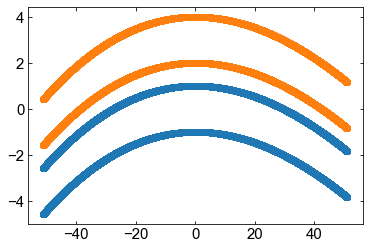

In [142]:
plt.scatter(p.skyprint['stream'].edges.phi1.value,
            p.skyprint['stream'].edges.phi2.value)
plt.scatter(p.skyprint['background'].edges.phi1.value,
            p.skyprint['background'].edges.phi2.value)

plot things in equatorial coordinates

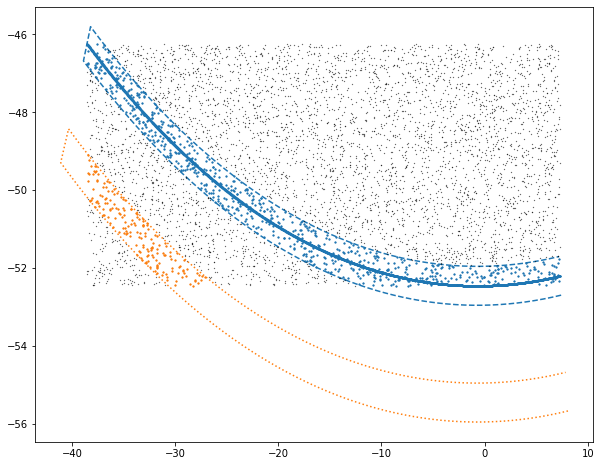

In [14]:

plt.figure(1,figsize=(10,8))
ax = plt.subplot(111)

#plot the track
#ax.plot(p.track.track.ra.wrap_at(180*u.deg), p.track.track.dec, '.', ms=2., color='C0') # because already wrapped
ax.plot(p.track.track.ra, p.track.track.dec, '.', ms=2., color='C0')

#plot the on-stream polygon
ax.plot(p.skyprint['stream'].edges.icrs.ra.wrap_at(180*u.deg), p.skyprint['stream'].edges.icrs.dec, ls='--', color='C0')

#plot random background "field" points 
ax.plot(field.ra.wrap_at(180*u.deg), field.dec, 'k.', ms=0.5)

#plot the field points inside the polygon footprint
ax.plot(field.ra[on].wrap_at(180*u.deg), field.dec[on], '.', ms=2.5, color='C0')

#Plot the off-stream polygon footprint and points selected inside it
ax.plot(p.skyprint['background'].edges.icrs.ra.wrap_at(180*u.deg), p.skyprint['background'].edges.icrs.dec, ls=':', color='C1')
ax.plot(field.ra[off].wrap_at(180*u.deg), field.dec[off], '.', ms=2.5, color='C1')

plot things in stream coordinates

(-10.0, 10.0)

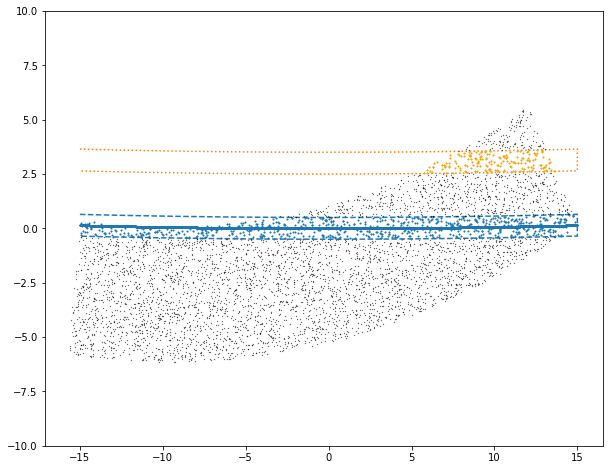

In [15]:

plt.figure(1,figsize=(10,8))
ax = plt.subplot(111)

#Plot the track in phi1/phi2
ax.plot(p.track.track.transform_to(p.stream_frame).phi1, 
        p.track.track.transform_to(p.stream_frame).phi2, '.', ms=2., color='C0')
#plot the on-stream polygon 
ax.plot(p.skyprint['stream'].edges.transform_to(p.stream_frame).phi1, 
        p.skyprint['stream'].edges.transform_to(p.stream_frame).phi2, ls='--', color='C0')
#plot the off-stream polygon
ax.plot(p.skyprint['background'].edges.transform_to(p.stream_frame).phi1, 
        p.skyprint['background'].edges.transform_to(p.stream_frame).phi2, ls=':', color='C1')

ax.plot(field.transform_to(p.stream_frame).phi1, field.transform_to(p.stream_frame).phi2,'.k', ms=0.5)
ax.plot(field[on].transform_to(p.stream_frame).phi1, field[on].transform_to(p.stream_frame).phi2,'.', ms=2)
ax.plot(field[off].transform_to(p.stream_frame).phi1, field[off].transform_to(p.stream_frame).phi2,'.', color='orange', ms=2)

ax.set_ylim(-10,10)

save the pawprint

In [8]:
p.save_pawprint()

/opt/anaconda3/envs/cats/lib/python3.8/site-packages/asdf/schema.py:301: AsdfWarning: Unable to locate schema file for 'tag:astropy.org:astropy/coordinates/frames/greatcircleicrsframe-1.0.0': 'http://astropy.org/schemas/astropy/coordinates/frames/greatcircleicrsframe-1.0.0'
  warnings.warn(msg.format(tag, schema_uri), AsdfWarning)


if you want to inspect the pawprint directly you can load it with asdf or astropy's asdf reader

In [9]:
import asdf
a = asdf.open('Jhelum-abonaca2019.asdf')

/opt/anaconda3/envs/cats/lib/python3.8/site-packages/asdf/yamlutil.py:300: AsdfConversionWarning: tag:astropy.org:astropy/coordinates/frames/greatcircleicrsframe-1.0.0 is not recognized, converting to raw Python data structure
  warnings.warn(


all the bits are in a dictionary

In [10]:
a.keys()

dict_keys(['asdf_library', 'history', 'cmd_filters', 'off_stream', 'on_stream', 'pawprint_ID', 'stream_frame', 'stream_name', 'width'])

In [11]:
a['stream_name']

'Jhelum-a'

In [12]:
a['on_stream']['sky']

{'footprint_type': 'sky',
 'stream_frame': {'frame_attributes': {'pole': <ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
     (178.37247005, -37.60347959, 1.)>, 'ra0': <Quantity 342.9753055 deg>, 'rotation': <Quantity 0. deg>}},
 'vertices': <array (unloaded) shape: [6000, 2] dtype: float64>}

In [13]:
a['off_stream']

{'footprint_type': 'sky',
 'stream_frame': {'frame_attributes': {'pole': <ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
     (178.37247005, -37.60347959, 1.)>, 'ra0': <Quantity 342.9753055 deg>, 'rotation': <Quantity 0. deg>}},
 'vertices': <array (unloaded) shape: [6000, 2] dtype: float64>}

right now this pawprint doesn't have any CMD footprints:

In [14]:
a['on_stream']['cmd']

or any PM footprints:

In [15]:
a['on_stream']['pm']

In [16]:
print(a['cmd_filters'])

None
